In [1]:
# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import brainpy as bp
import brainpy.math as bm
import seaborn as sns
from scipy import stats
import itertools
from scipy.signal import find_peaks

/home/spirit/anaconda3/envs/sbi_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
wt_exp_amp = np.load("data/WT_exp_amp.npy")
wt_exp_isi = np.load("data/WT_exp_isi.npy")
wt_sim_amp = np.load("data/WT_sim_amp.npy")
wt_sim_isi = np.load("data/WT_sim_isi.npy")

In [3]:
ad1006_amp = np.load('data/ad1006_amp.npz')
ad1006_isi = np.load('data/ad1006_isi.npz')
ad1006_rest = np.load('data/ad1006_rest.npz')
na_amp = np.load('data/na_amp.npz')
na_isi = np.load('data/na_isi.npz')
na_rest = np.load('data/na_rest.npz')

# 将数据放入字典中
ad1006_amp_sim = ad1006_amp['sim']
ad1006_amp_exp = ad1006_amp['exp']
ad1006_amp_exp = ad1006_amp_exp[ad1006_amp_exp > 25]

ad1006_isi_sim = ad1006_isi['sim']
ad1006_isi_exp = ad1006_isi['exp']

ad1006_rest_sim = ad1006_rest['sim']
ad1006_rest_exp = ad1006_rest['exp']

na_amp_sim = na_amp['sim']
na_amp_exp = na_amp['exp']  

na_isi_sim = na_isi['sim']
na_isi_exp = na_isi['exp']

na_rest_sim = na_rest['sim']
na_rest_exp = na_rest['exp']

In [4]:
wt_sim_rest = -28.8
wt_exp_rest = np.load("data/WT_exp_rest.npy")


In [5]:
print(wt_exp_rest)

[-25.5421566  -28.11945557 -29.13760483 -28.4065405  -27.23892821
 -27.65745534 -27.25849305 -26.08191588]


In [6]:
data   = [wt_exp_amp.tolist(), wt_sim_amp, ad1006_amp_exp.tolist(), ad1006_amp_sim.tolist()]
labels = ['$WT(exp)$', 'WT(sim)','$\it{ad1006}(exp)$', '$\it{ad1006}(sim)$']

data_isi =   [wt_exp_isi.tolist(), wt_sim_isi.tolist(), ad1006_isi_exp.tolist(), ad1006_isi_sim.tolist()]
labels_isi = ['$WT(exp)$', 'WT(sim)','$\it{ad1006}(exp)$', '$\it{ad1006}(sim)$']

data_rest   = [wt_exp_rest.tolist(), wt_sim_rest, ad1006_rest_exp.tolist(), ad1006_rest_sim.tolist()]
labels_rest = ['$WT(exp)$', 'WT(sim)','$\it{ad1006}(exp)$', '$\it{ad1006}(sim)$']

In [7]:
plt_style = {
    'figure.figsize' : (8, 6),
    'figure.autolayout' : True,
    'font.size' : 18,
    'lines.linewidth' : 3,
    'xtick.labelsize' : 24,
    'ytick.labelsize' : 24,
    'legend.fontsize' : 'small',
    'axes.spines.top' : False,
    'axes.spines.right' : False,
    'xtick.major.size' : 6,
    'ytick.major.size' : 6,
    'legend.fontsize' : 14,
    'axes.labelsize' : 24,
    'axes.titlesize' : 24,
    # 'font.family': "Times New Roman"
    }
for key, val in plt_style.items():
    plt.rcParams[key] = val

$WT(exp)$: ${59.61} \pm {0.35}\,\mathrm{mV}$
WT(sim): ${59.19} \pm {2.31}\,\mathrm{mV}$
$\it{ad1006}(exp)$: ${29.98} \pm {0.92}\,\mathrm{mV}$
$\it{ad1006}(sim)$: ${32.81} \pm {0.04}\,\mathrm{mV}$


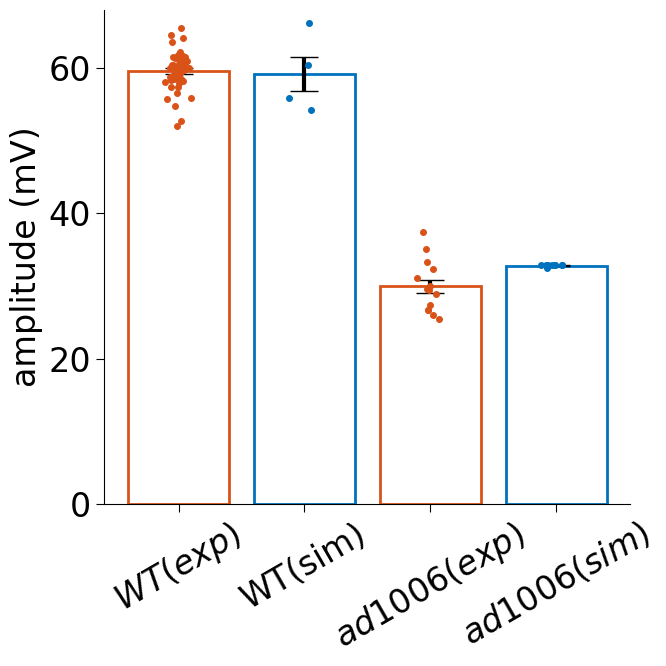

In [8]:
# Calculate means and standard errors
plt.rcParams['font.size'] = 18 
means = [np.mean(d) for d in data]
std_errors = [np.std(d) / np.sqrt(len(d)) for d in data]

for label, mean, std_err in zip(labels, means, std_errors):
    latex_output = f"{label}: ${{{mean:.2f}}} \\pm {{{std_err:.2f}}}\\,\\mathrm{{mV}}$"
    print(latex_output)

# Set colors for the borders of the bars
# border_colors = [[0.85,0.325,0.098], 'purple', 'black', [0,0.447,0.741]]
border_colors = [[0.85,0.325,0.098],[0,0.447,0.741], [0.85,0.325,0.098], [0,0.447,0.741]]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(7, 7))

# Create bar plot
bars = ax.bar(labels, means, yerr=std_errors, capsize=10, edgecolor=border_colors, color='none', linewidth=2)

# Plot individual data points
for i, d in enumerate(data):
    x = np.random.normal(i, 0.05, size=len(d))  # Adding jitter for better visibility
    ax.plot(x, d, 'o', color=border_colors[i], markersize=4)

# Customize labels and y-axis
ax.set_ylabel('amplitude (mV)')
ax.set_ylim([0, 68])
ax.set_yticks(np.arange(0, 61, 20))
plt.xticks(rotation=30)
# Add significance marker "n.s." (not significant)
# ax.text(1, 0, 'n.s', ha='center', va='center', fontsize=12, color='black')

# Display the plot
plt.tight_layout()
plt.savefig('Figure/ad_amp.svg',dpi=300)
plt.show()

In [15]:
print(np.array(means)*1e3)
print(np.array(std_errors)*1e3)

[ 53.28364723  48.80976195 168.50952381 116.58277218]
[ 6.39178173  1.29211325 11.22454572  0.08244866]


$WT(exp)$: ${0.05} \pm {0.01}\,\mathrm{s}$
WT(sim): ${0.05} \pm {0.00}\,\mathrm{s}$
$\it{ad1006}(exp)$: ${0.17} \pm {0.01}\,\mathrm{s}$
$\it{ad1006}(sim)$: ${0.12} \pm {0.00}\,\mathrm{s}$


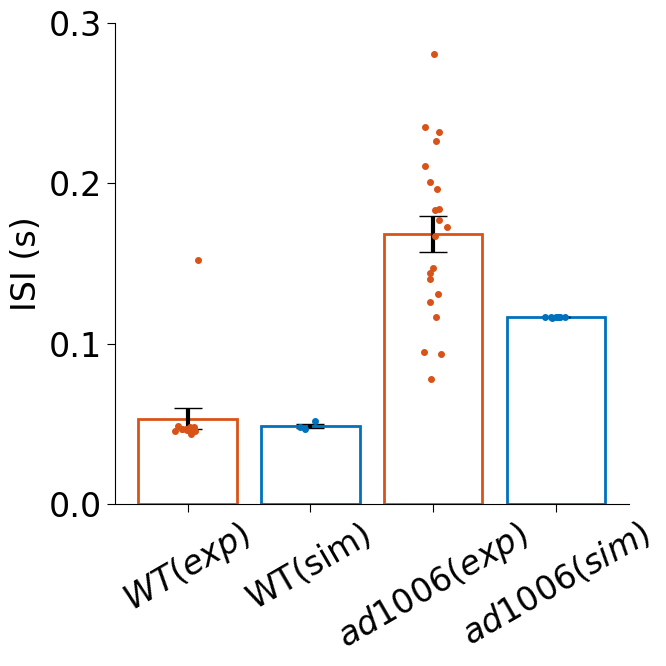

In [10]:
# Calculate means and standard errors
means = [np.mean(d) for d in data_isi]
std_errors = [np.std(d) / np.sqrt(len(d)) for d in data_isi]

for label, mean, std_err in zip(labels, means, std_errors):
    latex_output = f"{label}: ${{{mean:.2f}}} \\pm {{{std_err:.2f}}}\\,\\mathrm{{s}}$"
    print(latex_output)
# Set colors for the borders of the bars
# border_colors = ['black', 'purple', 'orange', 'green']

# Create the figure and axis
fig, ax = plt.subplots(figsize=(7, 7))

# Create bar plot
bars = ax.bar(labels_isi, means, yerr=std_errors, capsize=10, edgecolor=border_colors, color='none', linewidth=2)

# Plot individual data points
for i, d in enumerate(data_isi):
    x = np.random.normal(i, 0.05, size=len(d))  # Adding jitter for better visibility
    ax.plot(x, d, 'o', color=border_colors[i], markersize=4)

# Customize labels and y-axis
ax.set_ylabel('ISI (s)')
ax.set_ylim([0, 0.3])
ax.set_yticks(np.arange(0, 0.31, 0.1))
plt.xticks(rotation=30)
# Add significance marker "n.s." (not significant)
# ax.text(1, 0, 'n.s', ha='center', va='center', fontsize=12, color='black')

# Display the plot
plt.tight_layout()
plt.savefig('Figure/ad_isi.svg',dpi=300)
plt.show()

In [10]:
print(data_rest)

[[-25.542156600000002, -28.119455573505654, -29.137604831449433, -28.40654050215064, -27.23892820846254, -27.657455336600982, -27.25849304791437, -26.08191588476543], -28.8, [-22.96555309218203, -27.77417636272712, -22.35219586597767, -34.03959759959994], -26.183380126953125]


In [11]:
print(std_errors)

[0.006391781725382473, 0.0012921132476546057, 0.011224545715520704, 8.244865881647493e-05]


$WT(exp)$: ${-27.43} \pm {0.39}\,\mathrm{mV}$
WT(sim): ${-28.80} \pm {0.00}\,\mathrm{mV}$
$\it{ad1006}(exp)$: ${-26.78} \pm {2.34}\,\mathrm{mV}$
$\it{ad1006}(sim)$: ${-26.18} \pm {0.00}\,\mathrm{mV}$


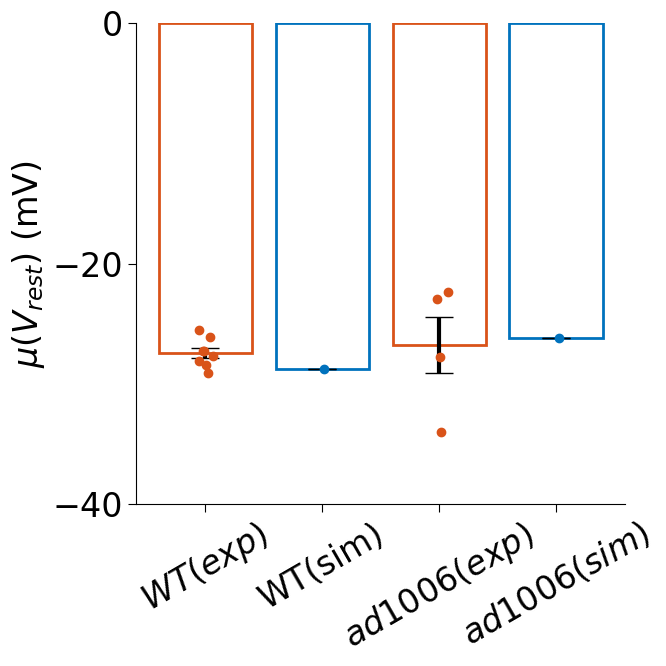

In [12]:
means = [np.mean(d) for d in data_rest]
std_errors = [np.std(d) / np.sqrt(len(d)) if isinstance(d, (list, np.ndarray)) and len(d) > 1 else 0 for d in data_rest]
for label, mean, std_err in zip(labels, means, std_errors):
    latex_output = f"{label}: ${{{mean:.2f}}} \\pm {{{std_err:.2f}}}\\,\\mathrm{{mV}}$"
    print(latex_output)

# Set colors for the borders of the bars
# border_colors = ['black', 'purple', 'orange', 'green']

# Create the figure and axis
fig, ax = plt.subplots(figsize=(7, 7))

# Create bar plot
bars = ax.bar(labels_rest, means, yerr=std_errors, capsize=10, edgecolor=border_colors, color='none', linewidth=2)

# Plot individual data points
for i, d in enumerate(data_rest):
    if isinstance(d, (list, np.ndarray)) and len(d) > 1:
        length = len(d)
    else:
        length = 1
    x = np.random.normal(i, 0.05, size=length)  # Adding jitter for better visibility
    ax.plot(x, d, 'o', color=border_colors[i])

# Customize labels and y-axis
ax.set_ylabel('$\mu(V_{rest})$ (mV)')
ax.set_ylim([-40., 0.])
ax.set_yticks(np.arange(-40, 0.1, 20))
plt.xticks(rotation=30)
# Add significance marker "n.s." (not significant)
# ax.text(1, 0, 'n.s', ha='center', va='center', fontsize=12, color='black')

# Display the plot
plt.tight_layout()
plt.savefig('Figure/ad_rest.svg',dpi=300)
plt.show()

In [13]:
print(ad1006_isi_exp)
print(ad1006_isi_sim)

[0.1771 0.1839 0.1962 0.1673 0.1725 0.1834 0.201  0.2806 0.1309 0.2351
 0.1403 0.1263 0.117  0.1472 0.144  0.2264 0.0947 0.0936 0.0779 0.2111
 0.2322]
[0.11600773 0.11660777 0.11660777 0.11680779 0.11660777 0.11660777
 0.11680779 0.11660777]
